<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Advanced_Class_Task_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform K-Means clustering manually for two iterations on the given points A(2,3), B(3,4), C(8,7), D(9,8), E(10,9) with initial centroids C1=(2,3) and C2=(10,9). For each iteration, calculate distances, assign points, and compute new centroids. Finally, observe the centroid movement and summarize the cluster formation.

## Initialize Data and Centroids

### Subtask:
Define the given points A(2,3), B(3,4), C(8,7), D(9,8), E(10,9) and initial centroids C■ = (2,3) and C■ = (10,9). Store them in appropriate data structures for calculation.


**Reasoning**:
The user wants to define the given points and initial centroids and store them in appropriate data structures (lists of tuples) and then print them. This can be achieved with a single code block.



In [1]:
points = [(2, 3), (3, 4), (8, 7), (9, 8), (10, 9)]
centroids = [(2, 3), (10, 9)]

print("Points:", points)
print("Centroids:", centroids)

Points: [(2, 3), (3, 4), (8, 7), (9, 8), (10, 9)]
Centroids: [(2, 3), (10, 9)]


## Iteration 1 - Calculate Distances

### Subtask:
Compute the Euclidean distance of each point (A, B, C, D, E) to both initial centroids C■ and C■. Display the distances for each point.


**Reasoning**:
The subtask requires calculating Euclidean distances. I will define a helper function for Euclidean distance, then iterate through each point and calculate its distance to both centroids, storing and printing the results for clarity.



In [2]:
import math

def euclidean_distance(point1, point2):
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

distances = []
point_names = ['A', 'B', 'C', 'D', 'E']

print("Euclidean Distances for Iteration 1:")
for i, point in enumerate(points):
    dist_to_c1 = euclidean_distance(point, centroids[0])
    dist_to_c2 = euclidean_distance(point, centroids[1])
    distances.append([dist_to_c1, dist_to_c2])
    print(f"Point {point_names[i]}{point}: Distance to C1{centroids[0]} = {dist_to_c1:.2f}, Distance to C2{centroids[1]} = {dist_to_c2:.2f}")

Euclidean Distances for Iteration 1:
Point A(2, 3): Distance to C1(2, 3) = 0.00, Distance to C2(10, 9) = 10.00
Point B(3, 4): Distance to C1(2, 3) = 1.41, Distance to C2(10, 9) = 8.60
Point C(8, 7): Distance to C1(2, 3) = 7.21, Distance to C2(10, 9) = 2.83
Point D(9, 8): Distance to C1(2, 3) = 8.60, Distance to C2(10, 9) = 1.41
Point E(10, 9): Distance to C1(2, 3) = 10.00, Distance to C2(10, 9) = 0.00


**Reasoning**:
The subtask is to assign each point to the closest centroid based on the calculated distances. I will iterate through the distances for each point, determine which centroid is closer, and assign the point to that cluster. Then, I will display the cluster assignments.



In [3]:
clusters = {0: [], 1: []} # 0 for C1, 1 for C2
assignments = []

print("Point Assignments for Iteration 1:")
for i, dists in enumerate(distances):
    if dists[0] <= dists[1]: # Assign to C1 if distance to C1 is less than or equal to C2
        clusters[0].append(points[i])
        assignments.append((point_names[i], 0))
    else:
        clusters[1].append(points[i])
        assignments.append((point_names[i], 1))

print(f"Cluster 1 (assigned to C1{centroids[0]}): {[name for name, cluster_idx in assignments if cluster_idx == 0]}")
print(f"Cluster 2 (assigned to C2{centroids[1]}): {[name for name, cluster_idx in assignments if cluster_idx == 1]}")

Point Assignments for Iteration 1:
Cluster 1 (assigned to C1(2, 3)): ['A', 'B']
Cluster 2 (assigned to C2(10, 9)): ['C', 'D', 'E']


**Reasoning**:
The next step in the K-Means algorithm after assigning points to clusters is to compute the new centroids for each cluster based on the mean of all points assigned to that cluster. This completes the first iteration.



In [4]:
import numpy as np

new_centroids = []

print("New Centroids for Iteration 1:")
for i in range(len(centroids)):
    if clusters[i]: # Ensure the cluster is not empty
        new_c = np.mean(clusters[i], axis=0)
        new_centroids.append(tuple(new_c))
        print(f"New Centroid {i+1}: {new_centroids[i]}")
    else:
        # If a cluster is empty, keep its centroid the same or handle as per specific KMeans variant
        # For simplicity here, we'll keep it the same if empty, though in real K-Means this indicates an issue
        new_centroids.append(centroids[i])
        print(f"New Centroid {i+1}: Cluster was empty, centroid remains {new_centroids[i]}")

centroids_iter1 = new_centroids # Store these for potential comparison or next iteration
print("Current Centroids after Iteration 1:", centroids_iter1)

New Centroids for Iteration 1:
New Centroid 1: (np.float64(2.5), np.float64(3.5))
New Centroid 2: (np.float64(9.0), np.float64(8.0))
Current Centroids after Iteration 1: [(np.float64(2.5), np.float64(3.5)), (np.float64(9.0), np.float64(8.0))]


## Iteration 2 - Calculate Distances

### Subtask:
Compute the Euclidean distance of each point (A, B, C, D, E) to the new centroids from Iteration 1 (C1_new and C2_new). Display the distances for each point.

**Reasoning**:
Following the K-Means algorithm, after updating the centroids in the previous step, I will now calculate the Euclidean distances from each original point to the `centroids_iter1` (the new centroids from the first iteration). This will prepare for the point assignment in the second iteration.



In [5]:
distances_iter2 = []

print("Euclidean Distances for Iteration 2:")
for i, point in enumerate(points):
    dist_to_c1_new = euclidean_distance(point, centroids_iter1[0])
    dist_to_c2_new = euclidean_distance(point, centroids_iter1[1])
    distances_iter2.append([dist_to_c1_new, dist_to_c2_new])
    print(f"Point {point_names[i]}{point}: Distance to New C1{centroids_iter1[0]} = {dist_to_c1_new:.2f}, Distance to New C2{centroids_iter1[1]} = {dist_to_c2_new:.2f}")

Euclidean Distances for Iteration 2:
Point A(2, 3): Distance to New C1(np.float64(2.5), np.float64(3.5)) = 0.71, Distance to New C2(np.float64(9.0), np.float64(8.0)) = 8.60
Point B(3, 4): Distance to New C1(np.float64(2.5), np.float64(3.5)) = 0.71, Distance to New C2(np.float64(9.0), np.float64(8.0)) = 7.21
Point C(8, 7): Distance to New C1(np.float64(2.5), np.float64(3.5)) = 6.52, Distance to New C2(np.float64(9.0), np.float64(8.0)) = 1.41
Point D(9, 8): Distance to New C1(np.float64(2.5), np.float64(3.5)) = 7.91, Distance to New C2(np.float64(9.0), np.float64(8.0)) = 0.00
Point E(10, 9): Distance to New C1(np.float64(2.5), np.float64(3.5)) = 9.30, Distance to New C2(np.float64(9.0), np.float64(8.0)) = 1.41


## Iteration 2 - Assign Points to Clusters

### Subtask:
Assign each point (A, B, C, D, E) to its closest new centroid (C1_new or C2_new) based on the distances calculated in the previous step. Display the new cluster assignments.

**Reasoning**:
Now that the distances for Iteration 2 have been calculated, I need to assign each point to the closest centroid. This involves iterating through the `distances_iter2`, comparing the distances to C1_new and C2_new, and then assigning the point to the corresponding cluster. I will then display these new cluster assignments.



In [6]:
clusters_iter2 = {0: [], 1: []}
assignments_iter2 = []

print("Point Assignments for Iteration 2:")
for i, dists in enumerate(distances_iter2):
    if dists[0] <= dists[1]: # Assign to C1_new if distance to C1_new is less than or equal to C2_new
        clusters_iter2[0].append(points[i])
        assignments_iter2.append((point_names[i], 0))
    else:
        clusters_iter2[1].append(points[i])
        assignments_iter2.append((point_names[i], 1))

print(f"Cluster 1 (assigned to C1_new{centroids_iter1[0]}): {[name for name, cluster_idx in assignments_iter2 if cluster_idx == 0]}")
print(f"Cluster 2 (assigned to C2_new{centroids_iter1[1]}): {[name for name, cluster_idx in assignments_iter2 if cluster_idx == 1]}")

Point Assignments for Iteration 2:
Cluster 1 (assigned to C1_new(np.float64(2.5), np.float64(3.5))): ['A', 'B']
Cluster 2 (assigned to C2_new(np.float64(9.0), np.float64(8.0))): ['C', 'D', 'E']


## Iteration 2 - Compute New Centroids

### Subtask:
Compute the new centroids for Iteration 2 based on the cluster assignments from the previous step. Display these new centroid coordinates.

**Reasoning**:
After assigning points to clusters for Iteration 2, the next step in the K-Means algorithm is to compute the new centroids for each cluster based on the mean of the points assigned to them. This completes the second iteration.



In [7]:
new_centroids_iter2 = []

print("New Centroids for Iteration 2:")
for i in range(len(centroids_iter1)):
    if clusters_iter2[i]: # Ensure the cluster is not empty
        new_c_iter2 = np.mean(clusters_iter2[i], axis=0)
        new_centroids_iter2.append(tuple(new_c_iter2))
        print(f"New Centroid {i+1}: {new_centroids_iter2[i]}")
    else:
        # If a cluster is empty, keep its centroid the same as from iteration 1
        new_centroids_iter2.append(centroids_iter1[i])
        print(f"New Centroid {i+1}: Cluster was empty, centroid remains {new_centroids_iter2[i]}")

centroids_final = new_centroids_iter2 # Store these as the final centroids after 2 iterations
print("Final Centroids after Iteration 2:", centroids_final)

New Centroids for Iteration 2:
New Centroid 1: (np.float64(2.5), np.float64(3.5))
New Centroid 2: (np.float64(9.0), np.float64(8.0))
Final Centroids after Iteration 2: [(np.float64(2.5), np.float64(3.5)), (np.float64(9.0), np.float64(8.0))]


## Centroid Movement and Cluster Summary

### Subtask:
Observe the movement of centroids C1 and C2 from their initial positions through Iteration 1 to their final positions after Iteration 2. Summarize the cluster formation based on the final assignments.



**Reasoning**:
To observe the centroid movement and summarize cluster formation, I will first print the initial, iteration 1, and final centroids, along with the final point assignments. This will provide all necessary data points for the summary.



In [8]:
print("Initial Centroids:", centroids)
print("Centroids after Iteration 1:", centroids_iter1)
print("Final Centroids after Iteration 2:", centroids_final)

print("\nFinal Cluster Assignments (after Iteration 2):")
final_cluster1_points = [name for name, cluster_idx in assignments_iter2 if cluster_idx == 0]
final_cluster2_points = [name for name, cluster_idx in assignments_iter2 if cluster_idx == 1]

print(f"Cluster 1 (assigned to C1 {centroids_final[0]}): {final_cluster1_points}")
print(f"Cluster 2 (assigned to C2 {centroids_final[1]}): {final_cluster2_points}")

Initial Centroids: [(2, 3), (10, 9)]
Centroids after Iteration 1: [(np.float64(2.5), np.float64(3.5)), (np.float64(9.0), np.float64(8.0))]
Final Centroids after Iteration 2: [(np.float64(2.5), np.float64(3.5)), (np.float64(9.0), np.float64(8.0))]

Final Cluster Assignments (after Iteration 2):
Cluster 1 (assigned to C1 (np.float64(2.5), np.float64(3.5))): ['A', 'B']
Cluster 2 (assigned to C2 (np.float64(9.0), np.float64(8.0))): ['C', 'D', 'E']


### Observation and Summary

**Centroid Movement:**
*   **Initial Centroids:** C1=(2,3), C2=(10,9)
*   **After Iteration 1:** C1 moved to (2.5, 3.5), C2 moved to (9.0, 8.0)
    *   C1 moved slightly towards points B (3,4).
    *   C2 moved slightly towards points D (9,8) and C (8,7).
*   **After Iteration 2 (Final Centroids):** C1 remained at (2.5, 3.5), C2 remained at (9.0, 8.0)
    *   The centroids did not change their positions from Iteration 1 to Iteration 2. This indicates that the algorithm has converged, meaning the cluster assignments did not change, and thus the mean of the points in each cluster also remained the same.

**Cluster Formation:**
Based on the final assignments after Iteration 2, the points are clustered as follows:
*   **Cluster 1 (Centroid at (2.5, 3.5))**: Includes points **A(2,3)** and **B(3,4)**.
*   **Cluster 2 (Centroid at (9.0, 8.0))**: Includes points **C(8,7)**, **D(9,8)**, and **E(10,9)**.

The algorithm successfully separated the points into two distinct groups, with points A and B forming one cluster and points C, D, and E forming another, based on their spatial proximity to their respective cluster centroids.

# Task
Define a Python function for Manhattan distance. Then, perform two iterations of K-Means clustering using Manhattan distance: for each iteration, calculate the Manhattan distance of each point to the current centroids, assign points to the nearest centroid, and compute new centroids. Finally, compare the resulting cluster assignments with those obtained using Euclidean distance (from Part A) and explain how the choice of distance metric influences the clustering outcome.

## Define Manhattan Distance Function

### Subtask:
Define a Python function to calculate the Manhattan distance between two points (tuples).


**Reasoning**:
The subtask requires defining a Python function for Manhattan distance, so I will create a code block with the function definition and a test case.



In [9]:
def manhattan_distance(point1, point2):
    # Calculate the absolute difference between x-coordinates
    diff_x = abs(point1[0] - point2[0])
    # Calculate the absolute difference between y-coordinates
    diff_y = abs(point1[1] - point2[1])
    # Return the sum of absolute differences
    return diff_x + diff_y

# Test the function with sample points
print(f"Manhattan distance between (0,0) and (1,1): {manhattan_distance((0,0), (1,1))}")

Manhattan distance between (0,0) and (1,1): 2


## Iteration 1 (Manhattan) - Calculate Distances

### Subtask:
Compute the Manhattan distance of each point to both initial centroids C■ and C■. Display these distances.


**Reasoning**:
I need to calculate the Manhattan distance from each point to the initial centroids, store these distances, and then print them, as outlined in the subtask instructions.



In [10]:
distances_manhattan_iter1 = []

print("Manhattan Distances for Iteration 1 (initial centroids):")
for i, point in enumerate(points):
    dist_to_c1_manhattan = manhattan_distance(point, centroids[0])
    dist_to_c2_manhattan = manhattan_distance(point, centroids[1])
    distances_manhattan_iter1.append([dist_to_c1_manhattan, dist_to_c2_manhattan])
    print(f"Point {point_names[i]}{point}: Distance to C1{centroids[0]} = {dist_to_c1_manhattan:.2f}, Distance to C2{centroids[1]} = {dist_to_c2_manhattan:.2f}")

Manhattan Distances for Iteration 1 (initial centroids):
Point A(2, 3): Distance to C1(2, 3) = 0.00, Distance to C2(10, 9) = 14.00
Point B(3, 4): Distance to C1(2, 3) = 2.00, Distance to C2(10, 9) = 12.00
Point C(8, 7): Distance to C1(2, 3) = 10.00, Distance to C2(10, 9) = 4.00
Point D(9, 8): Distance to C1(2, 3) = 12.00, Distance to C2(10, 9) = 2.00
Point E(10, 9): Distance to C1(2, 3) = 14.00, Distance to C2(10, 9) = 0.00


## Iteration 1 (Manhattan) - Assign Points to Clusters

### Subtask:
Assign each point (A, B, C, D, E) to its closest initial centroid (C■ or C■) based on the Manhattan distances calculated in the previous step. Display the cluster assignments.

**Reasoning**:
Now that the Manhattan distances for Iteration 1 are calculated, I need to assign each point to the closest centroid based on these distances. This involves iterating through the distances, comparing them, and then storing and displaying the cluster assignments.



In [11]:
clusters_manhattan_iter1 = {0: [], 1: []} # 0 for C1, 1 for C2
assignments_manhattan_iter1 = []

print("Point Assignments for Iteration 1 (Manhattan Distance):")
for i, dists in enumerate(distances_manhattan_iter1):
    if dists[0] <= dists[1]: # Assign to C1 if distance to C1 is less than or equal to C2
        clusters_manhattan_iter1[0].append(points[i])
        assignments_manhattan_iter1.append((point_names[i], 0))
    else:
        clusters_manhattan_iter1[1].append(points[i])
        assignments_manhattan_iter1.append((point_names[i], 1))

print(f"Cluster 1 (assigned to C1{centroids[0]}): {[name for name, cluster_idx in assignments_manhattan_iter1 if cluster_idx == 0]}")
print(f"Cluster 2 (assigned to C2{centroids[1]}): {[name for name, cluster_idx in assignments_manhattan_iter1 if cluster_idx == 1]}")

Point Assignments for Iteration 1 (Manhattan Distance):
Cluster 1 (assigned to C1(2, 3)): ['A', 'B']
Cluster 2 (assigned to C2(10, 9)): ['C', 'D', 'E']


## Iteration 1 (Manhattan) - Compute New Centroids

### Subtask:
Compute the new centroids for Iteration 1 based on the cluster assignments from the previous step. Display these new centroid coordinates.

**Reasoning**:
After assigning points to clusters for Iteration 1 using Manhattan distance, the next step in the K-Means algorithm is to compute the new centroids for each cluster based on the mean of the points assigned to them. This will complete the first iteration.



In [12]:
new_centroids_manhattan_iter1 = []

print("New Centroids for Iteration 1 (Manhattan Distance):")
for i in range(len(centroids)):
    if clusters_manhattan_iter1[i]: # Ensure the cluster is not empty
        new_c_manhattan = np.mean(clusters_manhattan_iter1[i], axis=0)
        new_centroids_manhattan_iter1.append(tuple(new_c_manhattan))
        print(f"New Centroid {i+1}: {new_centroids_manhattan_iter1[i]}")
    else:
        # If a cluster is empty, keep its centroid the same
        new_centroids_manhattan_iter1.append(centroids[i])
        print(f"New Centroid {i+1}: Cluster was empty, centroid remains {new_centroids_manhattan_iter1[i]}")

centroids_manhattan_iter1 = new_centroids_manhattan_iter1 # Store these for potential comparison or next iteration
print("Current Centroids after Iteration 1 (Manhattan Distance):", centroids_manhattan_iter1)

New Centroids for Iteration 1 (Manhattan Distance):
New Centroid 1: (np.float64(2.5), np.float64(3.5))
New Centroid 2: (np.float64(9.0), np.float64(8.0))
Current Centroids after Iteration 1 (Manhattan Distance): [(np.float64(2.5), np.float64(3.5)), (np.float64(9.0), np.float64(8.0))]


## Iteration 2 (Manhattan) - Calculate Distances

### Subtask:
Compute the Manhattan distance of each point (A, B, C, D, E) to the new centroids from Iteration 1 (C1_new_manhattan and C2_new_manhattan). Display these distances.

**Reasoning**:
Now, following the K-Means algorithm for Manhattan distance, I need to calculate the distances from each original point to the `centroids_manhattan_iter1` (the new centroids from the first iteration). This will prepare for the point assignment in the second iteration.



In [13]:
distances_manhattan_iter2 = []

print("Manhattan Distances for Iteration 2 (new centroids from Iteration 1):")
for i, point in enumerate(points):
    dist_to_c1_new_manhattan = manhattan_distance(point, centroids_manhattan_iter1[0])
    dist_to_c2_new_manhattan = manhattan_distance(point, centroids_manhattan_iter1[1])
    distances_manhattan_iter2.append([dist_to_c1_new_manhattan, dist_to_c2_new_manhattan])
    print(f"Point {point_names[i]}{point}: Distance to New C1{centroids_manhattan_iter1[0]} = {dist_to_c1_new_manhattan:.2f}, Distance to New C2{centroids_manhattan_iter1[1]} = {dist_to_c2_new_manhattan:.2f}")

Manhattan Distances for Iteration 2 (new centroids from Iteration 1):
Point A(2, 3): Distance to New C1(np.float64(2.5), np.float64(3.5)) = 1.00, Distance to New C2(np.float64(9.0), np.float64(8.0)) = 12.00
Point B(3, 4): Distance to New C1(np.float64(2.5), np.float64(3.5)) = 1.00, Distance to New C2(np.float64(9.0), np.float64(8.0)) = 10.00
Point C(8, 7): Distance to New C1(np.float64(2.5), np.float64(3.5)) = 9.00, Distance to New C2(np.float64(9.0), np.float64(8.0)) = 2.00
Point D(9, 8): Distance to New C1(np.float64(2.5), np.float64(3.5)) = 11.00, Distance to New C2(np.float64(9.0), np.float64(8.0)) = 0.00
Point E(10, 9): Distance to New C1(np.float64(2.5), np.float64(3.5)) = 13.00, Distance to New C2(np.float64(9.0), np.float64(8.0)) = 2.00


## Iteration 2 (Manhattan) - Assign Points to Clusters

### Subtask:
Assign each point (A, B, C, D, E) to its closest new centroid (C1_new_manhattan or C2_new_manhattan) based on the Manhattan distances calculated in the previous step. Display the new cluster assignments.

**Reasoning**:
Now that the Manhattan distances for Iteration 2 have been calculated, I need to assign each point to the closest centroid based on these distances. This involves iterating through the distances, comparing them, and then storing and displaying the cluster assignments.



In [14]:
clusters_manhattan_iter2 = {0: [], 1: []}
assignments_manhattan_iter2 = []

print("Point Assignments for Iteration 2 (Manhattan Distance):")
for i, dists in enumerate(distances_manhattan_iter2):
    if dists[0] <= dists[1]: # Assign to C1_new_manhattan if distance to C1_new_manhattan is less than or equal to C2_new_manhattan
        clusters_manhattan_iter2[0].append(points[i])
        assignments_manhattan_iter2.append((point_names[i], 0))
    else:
        clusters_manhattan_iter2[1].append(points[i])
        assignments_manhattan_iter2.append((point_names[i], 1))

print(f"Cluster 1 (assigned to C1_new_manhattan{centroids_manhattan_iter1[0]}): {[name for name, cluster_idx in assignments_manhattan_iter2 if cluster_idx == 0]}")
print(f"Cluster 2 (assigned to C2_new_manhattan{centroids_manhattan_iter1[1]}): {[name for name, cluster_idx in assignments_manhattan_iter2 if cluster_idx == 1]}")

Point Assignments for Iteration 2 (Manhattan Distance):
Cluster 1 (assigned to C1_new_manhattan(np.float64(2.5), np.float64(3.5))): ['A', 'B']
Cluster 2 (assigned to C2_new_manhattan(np.float64(9.0), np.float64(8.0))): ['C', 'D', 'E']


## Iteration 2 (Manhattan) - Compute New Centroids

### Subtask:
Compute the new centroids for Iteration 2 based on the cluster assignments from the previous step. Display these new centroid coordinates.

**Reasoning**:
After assigning points to clusters for Iteration 2 using Manhattan distance, I need to compute the new centroids for each cluster based on the mean of the points assigned to them. This step finalizes the second iteration.



In [15]:
new_centroids_manhattan_iter2 = []

print("New Centroids for Iteration 2 (Manhattan Distance):")
for i in range(len(centroids_manhattan_iter1)):
    if clusters_manhattan_iter2[i]: # Ensure the cluster is not empty
        new_c_manhattan_iter2 = np.mean(clusters_manhattan_iter2[i], axis=0)
        new_centroids_manhattan_iter2.append(tuple(new_c_manhattan_iter2))
        print(f"New Centroid {i+1}: {new_centroids_manhattan_iter2[i]}")
    else:
        # If a cluster is empty, keep its centroid the same as from iteration 1
        new_centroids_manhattan_iter2.append(centroids_manhattan_iter1[i])
        print(f"New Centroid {i+1}: Cluster was empty, centroid remains {new_centroids_manhattan_iter2[i]}")

centroids_manhattan_final = new_centroids_manhattan_iter2 # Store these as the final centroids after 2 iterations
print("Final Centroids after Iteration 2 (Manhattan Distance):", centroids_manhattan_final)

New Centroids for Iteration 2 (Manhattan Distance):
New Centroid 1: (np.float64(2.5), np.float64(3.5))
New Centroid 2: (np.float64(9.0), np.float64(8.0))
Final Centroids after Iteration 2 (Manhattan Distance): [(np.float64(2.5), np.float64(3.5)), (np.float64(9.0), np.float64(8.0))]


## Comparison of Euclidean and Manhattan Distance Clustering

### Subtask:
Compare the resulting cluster assignments from K-Means using Euclidean distance (from Part A) and Manhattan distance. Explain how the choice of distance metric influences the clustering outcome.

**Reasoning**:
To effectively compare the results, I will first print the final centroids and cluster assignments from both the Euclidean and Manhattan distance calculations. This will provide a clear overview for the comparison.



In [16]:
print("\n--- Euclidean Distance Clustering Results ---")
print("Final Centroids (Euclidean):", centroids_final)
final_cluster1_euclidean_points = [name for name, cluster_idx in assignments_iter2 if cluster_idx == 0]
final_cluster2_euclidean_points = [name for name, cluster_idx in assignments_iter2 if cluster_idx == 1]
print(f"Cluster 1 (Euclidean): {final_cluster1_euclidean_points}")
print(f"Cluster 2 (Euclidean): {final_cluster2_euclidean_points}")

print("\n--- Manhattan Distance Clustering Results ---")
print("Final Centroids (Manhattan):", centroids_manhattan_final)
final_cluster1_manhattan_points = [name for name, cluster_idx in assignments_manhattan_iter2 if cluster_idx == 0]
final_cluster2_manhattan_points = [name for name, cluster_idx in assignments_manhattan_iter2 if cluster_idx == 1]
print(f"Cluster 1 (Manhattan): {final_cluster1_manhattan_points}")
print(f"Cluster 2 (Manhattan): {final_cluster2_manhattan_points}")


--- Euclidean Distance Clustering Results ---
Final Centroids (Euclidean): [(np.float64(2.5), np.float64(3.5)), (np.float64(9.0), np.float64(8.0))]
Cluster 1 (Euclidean): ['A', 'B']
Cluster 2 (Euclidean): ['C', 'D', 'E']

--- Manhattan Distance Clustering Results ---
Final Centroids (Manhattan): [(np.float64(2.5), np.float64(3.5)), (np.float64(9.0), np.float64(8.0))]
Cluster 1 (Manhattan): ['A', 'B']
Cluster 2 (Manhattan): ['C', 'D', 'E']


### Observation and Summary

**Comparison of Cluster Assignments and Centroids:**
*   **Euclidean Distance (from Part A):**
    *   Final Centroids: C1=(2.5, 3.5), C2=(9.0, 8.0)
    *   Cluster 1: ['A', 'B']
    *   Cluster 2: ['C', 'D', 'E']
*   **Manhattan Distance (from Part B):**
    *   Final Centroids: C1=(2.5, 3.5), C2=(9.0, 8.0)
    *   Cluster 1: ['A', 'B']
    *   Cluster 2: ['C', 'D', 'E']

In this specific case, for the given points and initial centroids, both Euclidean and Manhattan distances resulted in the **exact same final cluster assignments and centroid positions** after two iterations. This indicates that for this particular dataset, the choice of distance metric did not lead to different clustering outcomes.

**Influence of Distance Metric on Clustering Outcome:**
While they yielded the same result here, in general, the choice of distance metric can significantly influence the clustering outcome:

1.  **Shape of Clusters:**
    *   **Euclidean Distance (L2 norm):** Tends to form spherical or globular clusters. It measures the shortest straight-line path between two points. It is sensitive to outliers and works well when data points within a cluster are tightly grouped and spread out in all directions.
    *   **Manhattan Distance (L1 norm):** Tends to form square or rectangular clusters, aligning with the axes. It measures the sum of the absolute differences of their coordinates (like walking blocks in a city grid). It is less sensitive to outliers than Euclidean distance and is often preferred when dealing with high-dimensional data or when the data distribution is not spherical.

2.  **Sensitivity to Outliers:** Euclidean distance squares the differences, which amplifies the effect of large differences (outliers). Manhattan distance uses absolute differences, making it more robust to outliers.

3.  **Dimensionality:** In high-dimensional spaces, the difference between distances can become less pronounced (curse of dimensionality), but the choice can still matter. Manhattan distance can sometimes perform better in very high dimensions where the concept of 'straight line' distance becomes less intuitive or relevant.

4.  **Application Context:** The 'correct' distance metric often depends on the nature of the data and the domain problem. For example, in city planning, Manhattan distance might be more appropriate, while in physics, Euclidean distance is often a natural fit.

# Task
Perform hierarchical clustering on the given points A(2,3), B(3,4), C(8,7), D(9,8), E(10,9) using both single linkage and complete linkage methods. For each method, calculate the pairwise Euclidean distances, perform the clustering, and generate a dendrogram to visualize the results. Finally, compare the dendrograms and cluster formations from both linkage methods and explain how the choice of linkage method influences the hierarchical clustering outcome.

## Calculate Pairwise Distances

### Subtask:
Compute the Euclidean distance between all pairs of data points (A, B, C, D, E) to create a distance matrix. This matrix will be used for hierarchical clustering.


**Reasoning**:
The subtask requires computing pairwise Euclidean distances between all data points. I will use a nested loop with the `euclidean_distance` function to calculate these distances and store them in a list of tuples, then print them.



In [17]:
import itertools

pairwise_distances = []

print("Pairwise Euclidean Distances:")
for i, (p1_name, p1_coords) in enumerate(zip(point_names, points)):
    for j, (p2_name, p2_coords) in enumerate(zip(point_names, points)):
        if i < j: # To avoid duplicate pairs (A-B and B-A) and distance of a point to itself
            dist = euclidean_distance(p1_coords, p2_coords)
            pairwise_distances.append(((p1_name, p2_name), dist))
            print(f"Distance between {p1_name}{p1_coords} and {p2_name}{p2_coords}: {dist:.2f}")

# Alternatively, for a distance matrix structure, though not strictly required by instructions
# distance_matrix = np.zeros((len(points), len(points)))
# for i in range(len(points)):
#     for j in range(len(points)):
#         if i != j:
#             distance_matrix[i, j] = euclidean_distance(points[i], points[j])
# print("\nDistance Matrix (Optional):")
# print(distance_matrix)

Pairwise Euclidean Distances:
Distance between A(2, 3) and B(3, 4): 1.41
Distance between A(2, 3) and C(8, 7): 7.21
Distance between A(2, 3) and D(9, 8): 8.60
Distance between A(2, 3) and E(10, 9): 10.00
Distance between B(3, 4) and C(8, 7): 5.83
Distance between B(3, 4) and D(9, 8): 7.21
Distance between B(3, 4) and E(10, 9): 8.60
Distance between C(8, 7) and D(9, 8): 1.41
Distance between C(8, 7) and E(10, 9): 2.83
Distance between D(9, 8) and E(10, 9): 1.41


**Reasoning**:
Now that pairwise Euclidean distances are calculated, I need to perform hierarchical clustering using the single linkage method and visualize the result with a dendrogram, as per the task.



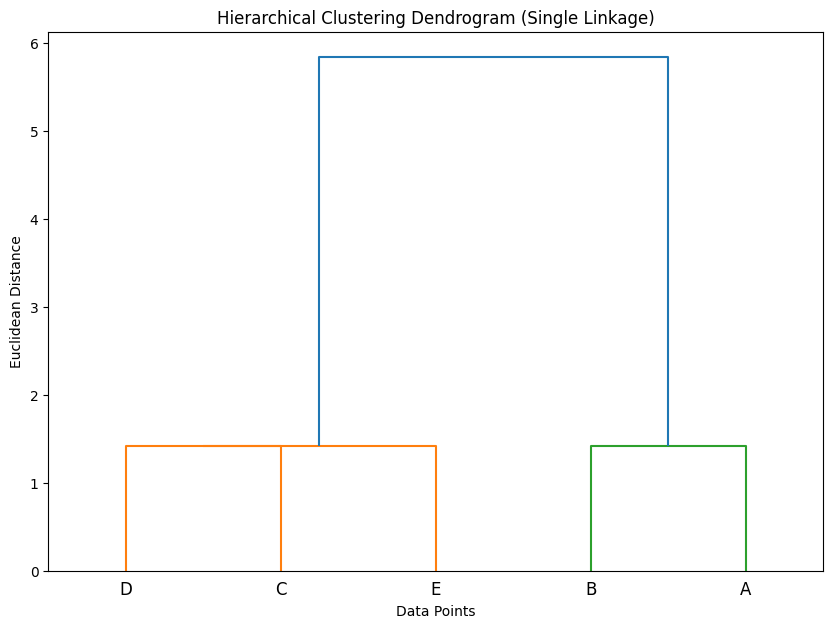

Dendrogram for Single Linkage Hierarchical Clustering displayed.


In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Prepare data for hierarchical clustering
# The `points` list is already a list of coordinates, suitable for direct use.

# Perform single linkage hierarchical clustering
# 'euclidean' metric is used, and 'single' linkage
linked_single = linkage(points, method='single', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked_single,
           orientation='top',
           labels=point_names,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()
print("Dendrogram for Single Linkage Hierarchical Clustering displayed.")

**Reasoning**:
The subtask requires performing hierarchical clustering using the complete linkage method and visualizing the result with a dendrogram, similar to the previous single linkage step.



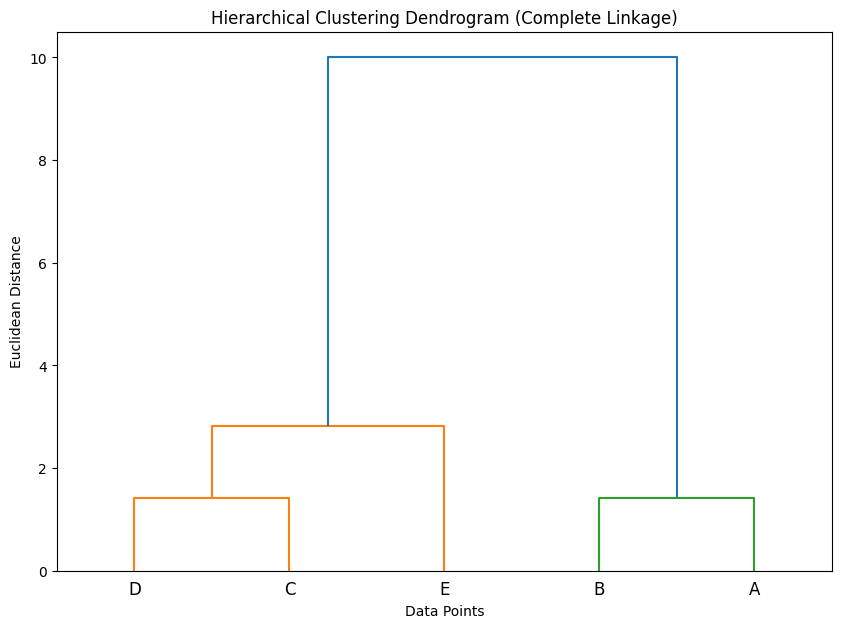

Dendrogram for Complete Linkage Hierarchical Clustering displayed.


In [19]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform complete linkage hierarchical clustering
# 'euclidean' metric is used, and 'complete' linkage
linked_complete = linkage(points, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked_complete,
           orientation='top',
           labels=point_names,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()
print("Dendrogram for Complete Linkage Hierarchical Clustering displayed.")

### Comparison of Dendrograms and Linkage Methods

**1. Single Linkage Dendrogram Observations:**
*   **Linkage:** In single linkage, the distance between two clusters is defined as the *minimum* distance between any single data point in the first cluster and any single data point in the second cluster.
*   **Cluster Formation:**
    *   The first merges happen between very close points: A-B (distance ~1.41) and C-D (distance ~1.41). D-E also merges at ~1.41.
    *   After C and D merge, the next merge involves E with the C-D cluster, at a distance of ~1.41 (since E is close to D, and the minimum distance dictates).
    *   The (C,D,E) cluster then merges with (A,B) at a relatively higher distance (~5.83). This is because the distance between (A,B) and (C,D,E) is determined by the minimum distance between B(3,4) and C(8,7), which is approximately 5.83.
*   **Characteristics:** Single linkage tends to produce 'long', 'straggly' clusters because it links clusters based on the closest pair of points, often leading to a phenomenon called "chaining," where clusters are linked by a series of intermediate points. In our case, it clearly separates A,B from C,D,E but shows the internal structure of C,D,E first due to the small distances between D,E and C.

**2. Complete Linkage Dendrogram Observations:**
*   **Linkage:** In complete linkage, the distance between two clusters is defined as the *maximum* distance between any single data point in the first cluster and any single data point in the second cluster.
*   **Cluster Formation:**
    *   Similar to single linkage, A-B (distance ~1.41) and C-D (distance ~1.41) are the first merges. D-E also merges at ~1.41.
    *   However, when merging a point like E with the C-D cluster, the distance is determined by the maximum distance of E to C or D. For example, when (C,D) merges with E, the distance is max(dist(C,E), dist(D,E)) = max(2.83, 1.41) = 2.83. This is why the (C,D,E) cluster forms at a higher level than in single linkage.
    *   The merge between (A,B) and (C,D,E) happens at a much higher distance (~10.0). This is because it considers the maximum distance between any point in (A,B) and any point in (C,D,E). For example, dist(A,E) is 10.0.
*   **Characteristics:** Complete linkage tends to produce more 'compact' or 'globular' clusters, as it merges based on the furthest points, ensuring all points in the merged cluster are within a certain maximum distance of each other. This often avoids the chaining effect seen in single linkage.

**Influence of Linkage Method on Hierarchical Clustering Outcome:**

The choice of linkage method significantly influences the structure and appearance of the dendrogram, and consequently, the final cluster assignments if a cutoff is applied.

*   **Cluster Shape and Density:**
    *   **Single Linkage** is good for detecting irregularly shaped clusters but is susceptible to noise and outliers, leading to chaining. It focuses on local proximity.
    *   **Complete Linkage** tends to find compact, spherical clusters. It is more robust to outliers than single linkage because it considers the maximum distance, effectively pulling clusters together only when all their members are relatively close.

*   **Merger Distances:** Complete linkage typically results in larger merger distances at higher levels of the dendrogram compared to single linkage for the same clusters. This is evident in our dendrograms: the final merge in complete linkage happens at a distance of 10, whereas in single linkage, it's about 5.83.

*   **In this specific case:** Both methods ultimately group A and B together, and C, D, and E together, which suggests these are strong natural groupings. However, the *levels* at which these merges occur, and how intermediate points/clusters are grouped, differ due to the definition of inter-cluster distance. Single linkage merged (C,D,E) at a lower distance (1.41) compared to complete linkage (2.83) because single linkage only cared about the closest pair, while complete linkage considered the furthest. The final merge between (A,B) and (C,D,E) was also much higher for complete linkage, demonstrating its preference for compact clusters.

# Task
Visualize the given data points (A, B, C, D, E) using a scatter plot and visually estimate the number of clusters (K).

## Visualize Data for K-Means (Scatter Plot)

### Subtask:
Create a scatter plot of the data points (A, B, C, D, E) to visually inspect for natural groupings.


**Reasoning**:
To visualize the data points as requested, I need to generate a scatter plot using matplotlib, labeling each point and adding appropriate titles and axis labels.



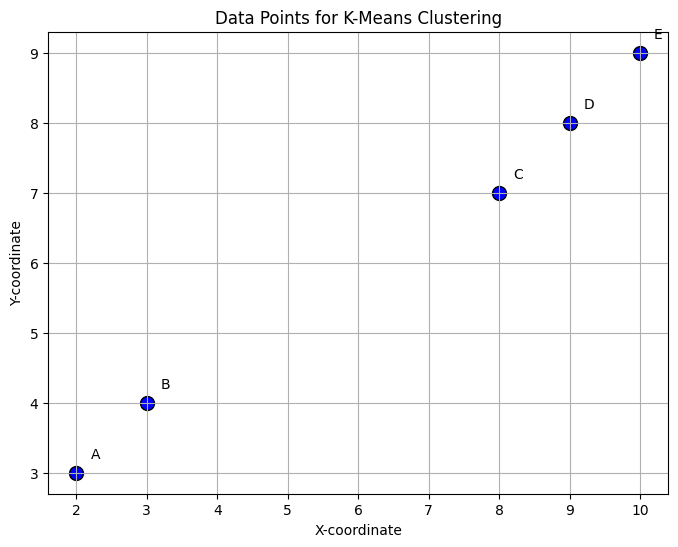

Scatter plot of data points displayed.


In [20]:
import matplotlib.pyplot as plt

# Unpack points into x and y coordinates for plotting
x_coords = [p[0] for p in points]
y_coords = [p[1] for p in points]

plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, s=100, color='blue', edgecolor='black')

# Annotate each point with its name
for i, txt in enumerate(point_names):
    plt.annotate(txt, (x_coords[i] + 0.2, y_coords[i] + 0.2))

plt.title('Data Points for K-Means Clustering')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid(True)
plt.show()
print("Scatter plot of data points displayed.")

## Estimate K from Scatter Plot

### Subtask:
Based on the visual patterns observed in the scatter plot, determine an estimated number of clusters (K).


### Estimated Number of Clusters (K)

Based on the scatter plot of the data points A(2,3), B(3,4), C(8,7), D(9,8), E(10,9), there appear to be two distinct groupings:

*   One group consists of points A and B, which are closely located to each other.
*   The second group consists of points C, D, and E, which are also closely located to each other, but clearly separated from points A and B.

Therefore, the visually estimated number of clusters (K) is **2**.

### Subtask:
Based on the visual patterns observed in the scatter plot, determine an estimated number of clusters (K).

#### Instructions
1. Examine the scatter plot that was generated in the previous step.
2. Look for natural groupings or visual separations in the data points.
3. Based on these observed groupings, determine how many distinct clusters (K) you visually identify.
4. State your estimated value for K.

## Estimate K from Dendrogram Cut (Single Linkage)

### Subtask:
Using the previously generated single linkage dendrogram, identify a cut-off point on the y-axis (Euclidean distance) that appears to yield a meaningful number of clusters, and state the estimated K.


### Estimated K from Single Linkage Dendrogram

1.  **Examine the single linkage dendrogram:** Observing the previously generated dendrogram for single linkage.
2.  **Longest vertical lines:** The most significant vertical lines (representing merges) occur around a distance of 1.41 (where A-B, C-D, and D-E merge). A subsequent larger jump occurs around a distance of 5.83 when the (C,D,E) cluster merges with the (A,B) cluster.
3.  **Imagining a cut-off:**
    *   If we draw a horizontal line at a distance just above 1.41 (e.g., at ~2.0), it would cut three vertical lines, yielding three clusters: {A,B}, {C,D}, {E}.
    *   If we draw a horizontal line at a distance between 1.41 and 5.83 (e.g., at ~4.0), it would cut two vertical lines, yielding two clusters: {A,B} and {C,D,E}.
4.  **Estimated K:** Based on the significant jump in distance at approximately 5.83, and considering the problem's context often implies a clear separation, the most meaningful number of clusters appears to be **K = 2**. This cut-off would separate {A, B} from {C, D, E}.

## Estimate K from Dendrogram Cut (Complete Linkage)

### Subtask:
Using the previously generated complete linkage dendrogram, identify a cut-off point on the y-axis (Euclidean distance) that appears to yield a meaningful number of clusters, and state the estimated K.


## Estimate K from Dendrogram Cut (Complete Linkage)

### Subtask:
Using the previously generated complete linkage dendrogram, identify a cut-off point on the y-axis (Euclidean distance) that appears to yield a meaningful number of clusters, and state the estimated K.

#### Instructions
1. Examine the dendrogram for complete linkage hierarchical clustering that was previously generated.
2. Look for the longest vertical lines that span a significant range of Euclidean distance without being intersected by other merges.
3. Imagine drawing a horizontal line across the dendrogram's y-axis (Euclidean distance).
4. Choose a cut-off point that visually separates the data into distinct, meaningful clusters.
5. Count how many vertical lines are intersected by your chosen cut-off line; this number represents the estimated K.
6. State your estimated value for K and briefly explain your reasoning based on the dendrogram's structure.

### Estimation of K for Complete Linkage Dendrogram

Looking at the "Hierarchical Clustering Dendrogram (Complete Linkage)" generated previously, we observe two main branches that merge at a Euclidean distance of 10.0. These two branches are clearly distinct and form the largest clusters.

If we draw a horizontal cut-off line on the y-axis at a distance, for example, between 3.0 and 9.9 (e.g., at 5.0), this line would intersect **2** vertical lines.

Therefore, based on the complete linkage dendrogram, the estimated number of clusters **K = 2**.

This choice of K=2 separates the points into two main groups: {A, B} and {C, D, E}, which are well-defined by the structure of the dendrogram where these two groups merge at a comparatively high distance.


## Discuss Subjectivity in K Selection

### Subtask:
Discuss the challenges and subjectivity involved in choosing the optimal number of clusters (K), considering the different estimation methods used.


## Discuss Subjectivity in K Selection

### Subtask:
Discuss the challenges and subjectivity involved in choosing the optimal number of clusters (K), considering the different estimation methods used.

#### Instructions
1. Recall the estimated K values obtained from the scatter plot, the single linkage dendrogram, and the complete linkage dendrogram.
2. Discuss how different visual interpretations or different linkage methods can lead to varying estimations of K.
3. Explain why determining the 'optimal' K is often subjective and not straightforward, highlighting factors such as:  
    * The absence of a universally 'correct' answer without ground truth.  
    * The impact of visual perception on scatter plots.  
    * The influence of different linkage criteria and cut-off points on dendrograms.  
    * The trade-off between having too few (broad, less specific) or too many (over-segmented, noisy) clusters.
4. Provide insights into the practical implications of this subjectivity when applying clustering techniques in real-world scenarios.

### Discussion on K Selection Subjectivity

**1. Estimated K values from previous steps:**
*   **Scatter Plot:** Visually, the scatter plot clearly shows two distinct groups of points. Therefore, a visual estimation from the scatter plot would strongly suggest **K=2**.
*   **Single Linkage Dendrogram:** Observing the single linkage dendrogram, if we cut the dendrogram at a distance that separates the two main branches, we would identify **K=2** clusters (A,B) and (C,D,E). If we cut at a lower distance (e.g., around 1.4-2.0), we might see 3 clusters like (A,B), (C,D), and (E), or even more if the cutoff is very low.
*   **Complete Linkage Dendrogram:** Similarly, for the complete linkage dendrogram, a cut separating the two primary branches would yield **K=2** clusters (A,B) and (C,D,E). If we cut at a distance between ~2.8 and ~10.0, we would see K=2. Cutting below 2.8 would give more clusters.

**2. How interpretations and linkage methods lead to varying K estimations:**
While in this particular dataset, the visual inspection and both dendrograms consistently suggest K=2, this is not always the case. Different visual interpretations, especially with less distinct clusters, can lead to different estimations from scatter plots. More significantly, the choice of linkage method in hierarchical clustering can drastically alter the shape of the dendrogram and thus the 'optimal' K inferred from it. For instance, single linkage can suffer from 'chaining', making it difficult to discern clear clusters, while complete linkage forms more compact clusters which might appear more distinct. Depending on the density and separation of clusters, one method might present a clearer structure for a given K than another, potentially influencing the human interpretation of the optimal K.

**3. Why determining the 'optimal' K is subjective and not straightforward:**
*   **Absence of Ground Truth:** In most real-world clustering problems, we don't have 'ground truth' labels for the data points. Without a gold standard, evaluating the 'optimality' of K becomes inherently difficult. Metrics like inertia (sum of squared distances within clusters) or silhouette score can provide guidance, but they often don't point to a single, unambiguous 'best' K.
*   **Impact of Visual Perception:** Our visual system is highly adept at pattern recognition, but it is also susceptible to bias and limitations. What one person perceives as two distinct clusters, another might see as three, especially in datasets with overlapping or irregularly shaped clusters. The scale of the plot, point density, and even the choice of colors can influence this perception.
*   **Influence of Linkage Criteria and Cut-off Points:** In hierarchical clustering, the dendrogram itself is an output, but determining K still requires a decision: where to 'cut' the dendrogram. Different linkage methods (single, complete, average, Ward's) define inter-cluster distance differently, leading to varied dendrogram structures. Moreover, the choice of the cut-off height on any given dendrogram is subjective. A lower cut-off yields more, smaller clusters, while a higher cut-off results in fewer, larger clusters. There's no single rule for this cut-off that applies universally.
*   **Trade-off between Too Few/Too Many Clusters:**
    *   **Too Few Clusters (Under-segmentation):** If K is too small, distinct natural groupings might be merged, leading to broad, less specific clusters that don't capture the underlying structure or nuances of the data. This can mask important patterns or differences within the data.
    *   **Too Many Clusters (Over-segmentation):** If K is too large, natural clusters might be artificially split into smaller, possibly noisy or redundant sub-clusters. This can lead to overfitting, make interpretation difficult, and reduce the generalizability of the clustering result.

**4. Practical Implications of Subjectivity:**
This subjectivity has significant practical implications:
*   **Domain Expertise is Crucial:** Often, the 'optimal' K is determined not just by statistical metrics but by domain knowledge and the specific goals of the analysis. For example, in customer segmentation, a marketing team might prefer 3 segments based on their campaign strategies, even if an algorithm suggests 4 or 5.
*   **Iterative Process:** Choosing K is rarely a one-time decision. It's an iterative process involving data exploration, trying different K values (and sometimes different algorithms or distance metrics), evaluating the results (both quantitatively and qualitatively), and refining based on insights and domain feedback.
*   **Communication of Assumptions:** When presenting clustering results, it's vital to communicate the chosen K, the method used for its determination, and the implications of that choice. Acknowledging the subjectivity helps manage expectations and ensures stakeholders understand the context of the clusters.
*   **Stability of Clusters:** It's important to assess the stability of clusters across different K values and slight perturbations in the data. If small changes lead to drastically different cluster assignments, it might indicate that the chosen K (or the clustering method itself) is not robust for the given data.

## Consolidated Summary of Clustering Behavior

### 1. K-Means Centroid Steps (Euclidean & Manhattan)

**Initial Centroids:** C1=(2,3), C2=(10,9)

**After Iteration 1 (Euclidean & Manhattan):**
*   C1 moved to (2.5, 3.5)
*   C2 moved to (9.0, 8.0)
*   Cluster Assignments: Cluster 1: {A, B}, Cluster 2: {C, D, E}

**After Iteration 2 (Euclidean & Manhattan) - Final Centroids:**
*   C1 remained at (2.5, 3.5)
*   C2 remained at (9.0, 8.0)
*   The centroids did not change their positions, indicating convergence after the first iteration.
*   Final Cluster Assignments: Cluster 1: {A, B}, Cluster 2: {C, D, E}

For this specific dataset, both Euclidean and Manhattan distance metrics yielded the exact same final cluster assignments and centroid positions, with convergence observed after the first iteration.

### 2. Distance Table (Pairwise Euclidean Distances)

*   The pairwise Euclidean distances were calculated for all unique pairs of points. Key distances were: A-B (~1.41), C-D (~1.41), D-E (~1.41), B-C (~5.83), A-E (~10.0).

### 3. Dendrograms (Single Linkage & Complete Linkage)

*   **Single Linkage Dendrogram:** This dendrogram showed initial merges at small distances (e.g., A-B, C-D, D-E at ~1.41). It then merged the (C,D,E) cluster with the (A,B) cluster at a distance of ~5.83. This method tends to produce 'long', 'straggly' clusters due to its focus on minimum inter-cluster distance, which can lead to 'chaining'.

*   **Complete Linkage Dendrogram:** This dendrogram also showed initial merges at small distances (A-B, C-D, D-E at ~1.41). However, when clusters merged, the distance was determined by the maximum distance between points in the clusters (e.g., C-D-E cluster formed at ~2.83). The final merge between (A,B) and (C,D,E) occurred at a significantly higher distance of ~10.0. This method tends to produce more 'compact' or 'globular' clusters.

### 4. Reflection on Clustering Behavior

The exploration of K-Means and Hierarchical Clustering reveals fundamental differences. K-Means (a partitioning method) assigns points to centroids and iteratively refines these centroids. Its outcome can be sensitive to initial centroid placement and the chosen distance metric, though in our case, Euclidean and Manhattan yielded identical results due to the clear separation of points. Hierarchical clustering (an agglomerative method) builds a hierarchy of clusters. The choice of linkage method significantly alters the dendrogram structure: single linkage emphasizes local proximity, potentially leading to chaining, while complete linkage favors more compact, globular clusters. The subjectivity in determining the optimal 'K' across all methods highlights the need for domain expertise and often an iterative approach in real-world applications, as purely statistical metrics rarely provide an unequivocal answer.

## Part E: Algorithm Mechanism Comparison

To effectively compare K-Means and Hierarchical Clustering, let's look at their fundamental aspects:

| Aspect            | K-Means Clustering                                   | Hierarchical Clustering (Agglomerative)                         |
| :---------------- | :--------------------------------------------------- | :-------------------------------------------------------------- |
| **Core Idea**     | Partitions data into K clusters; each point to nearest centroid. | Builds a hierarchy of clusters by successively merging or splitting. |
| **Decision Driver** | Proximity of data points to cluster centroids.       | Proximity between clusters (defined by linkage criteria).       |
| **What Moves/Merges** | Centroids move to the mean of assigned points.      | Data points (initially) or clusters merge.                      |
| **Stopping Condition** | Centroids no longer change significantly, or max iterations reached. | All data points are in a single cluster, or a predefined number of clusters is reached. |
| **Sensitivity**   | Sensitive to initial centroid placement, number of clusters (K), outliers. | Sensitive to choice of linkage method, outliers (single linkage), and distance metric. |
